In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox ##used to reduce skewness and make data more normally distributed.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [81]:
data=np.random.exponential(scale=2, size=1000)
df=pd.DataFrame({"Salary": data})

In [82]:
df.head()

,Salary
0,2.672311
1,1.090311
2,1.205775
3,4.092602
4,1.173211


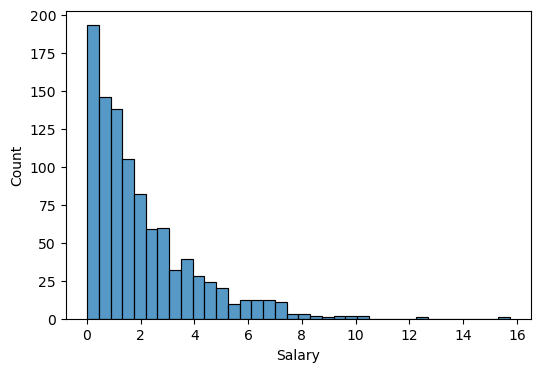

In [83]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

beans(individual bars) in histogram it will create a beans based on the range and it is a right skew

In [84]:
df.Salary.skew()

1.80318247866741

In [85]:
df["updated_Salary"] , lambda_val=boxcox(df.Salary)

In [86]:
df.head()

,Salary,updated_Salary
0,2.672311,1.126717
1,1.090311,0.087487
2,1.205775,0.191961
3,4.092602,1.716966
4,1.173211,0.163262


In [87]:
lambda_val

0.27171658499376294

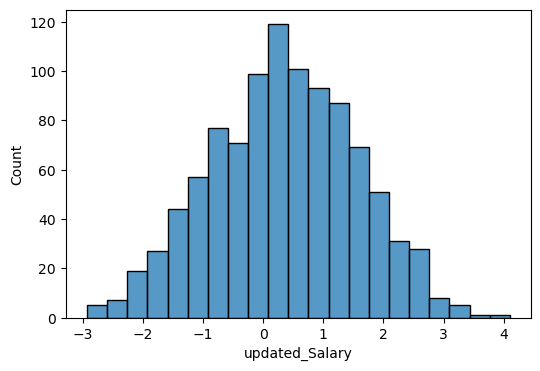

In [88]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()                ##normal distribution

In [89]:
#left skewed distribution

In [90]:
data=np.random.exponential(scale=2, size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})

In [91]:
df.head()

,Salary2
0,7.419089
1,9.186031
2,6.609947
3,9.183899
4,6.441058


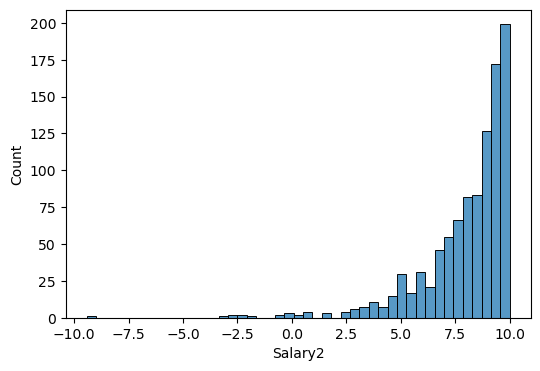

In [92]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [93]:
df.Salary2.skew()

-2.375118279927111

In [94]:
df["reflex_salary"]=df.Salary2.max()-df.Salary2

In [95]:
df.head()

,Salary2,reflex_salary
0,7.419089,2.578035
1,9.186031,0.811093
2,6.609947,3.387177
3,9.183899,0.813225
4,6.441058,3.556066


In [96]:
df["transformed_salary"] = np.log(df["reflex_salary"] + 1)

In [97]:
 df.head()

,Salary2,reflex_salary,transformed_salary
0,7.419089,2.578035,1.274814
1,9.186031,0.811093,0.593930
2,6.609947,3.387177,1.478686
3,9.183899,0.813225,0.595107
4,6.441058,3.556066,1.516460


In [98]:
df.transformed_salary.skew()

0.5121583075736224

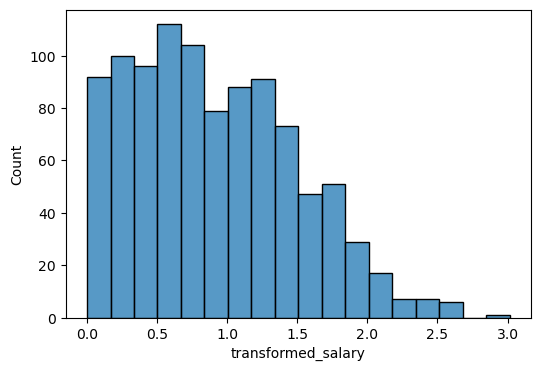

In [99]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_salary)
plt.show()

In [100]:
df=pd.read_csv(r"C:\Users\archana\OneDrive\Desktop\test2.csv")
df


,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [101]:
df.shape

(6, 5)

In [102]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [103]:
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,29.0,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [104]:
df["Salary"] = df["Salary"].fillna(df["Salary"].median())

In [105]:
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,29.0,IT,62000.0
4,4,Eve,29.0,HR,60000.0
5,5,Alice,25.0,HR,50000.0


In [106]:
encoder=LabelEncoder()

In [107]:
df["transformed_name"]=encoder.fit_transform(df.Name)

In [108]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,29.0,IT,62000.0,3
4,4,Eve,29.0,HR,60000.0,4


In [109]:
encoder2=OneHotEncoder(sparse_output=False)


In [110]:
encoded=encoder2.fit_transform(df[["Department"]])

In [111]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [112]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [113]:
##label encoder and onehot encoder method is used to convert string into numerical formate

In [114]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [115]:
scaler=StandardScaler()

In [116]:
df["scaled_salary"]=scaler.fit_transform(df[["Salary"]])

In [117]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.239501
1,1,Bob,30.0,IT,60000.0,1,0.190693
2,2,Charlie,35.0,Finance,70000.0,2,1.620886
3,3,David,29.0,IT,62000.0,3,0.476731
4,4,Eve,29.0,HR,60000.0,4,0.190693


In [118]:
scaler=MinMaxScaler()

In [119]:
df["scaled_salary"]=scaler.fit_transform(df[["Salary"]])

In [120]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,0.0
1,1,Bob,30.0,IT,60000.0,1,0.5
2,2,Charlie,35.0,Finance,70000.0,2,1.0
3,3,David,29.0,IT,62000.0,3,0.6
4,4,Eve,29.0,HR,60000.0,4,0.5


data Visualization
linechart= Time series analysis
barchart= data distribution of categories
histogram= single column distribution
scatter plots= relation between 2 variables
pie chart= distribution of categories


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data=pd.read_csv(r"C:\Users\archana\OneDrive\Desktop\data_visualization.csv")

In [123]:
data.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


In [124]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

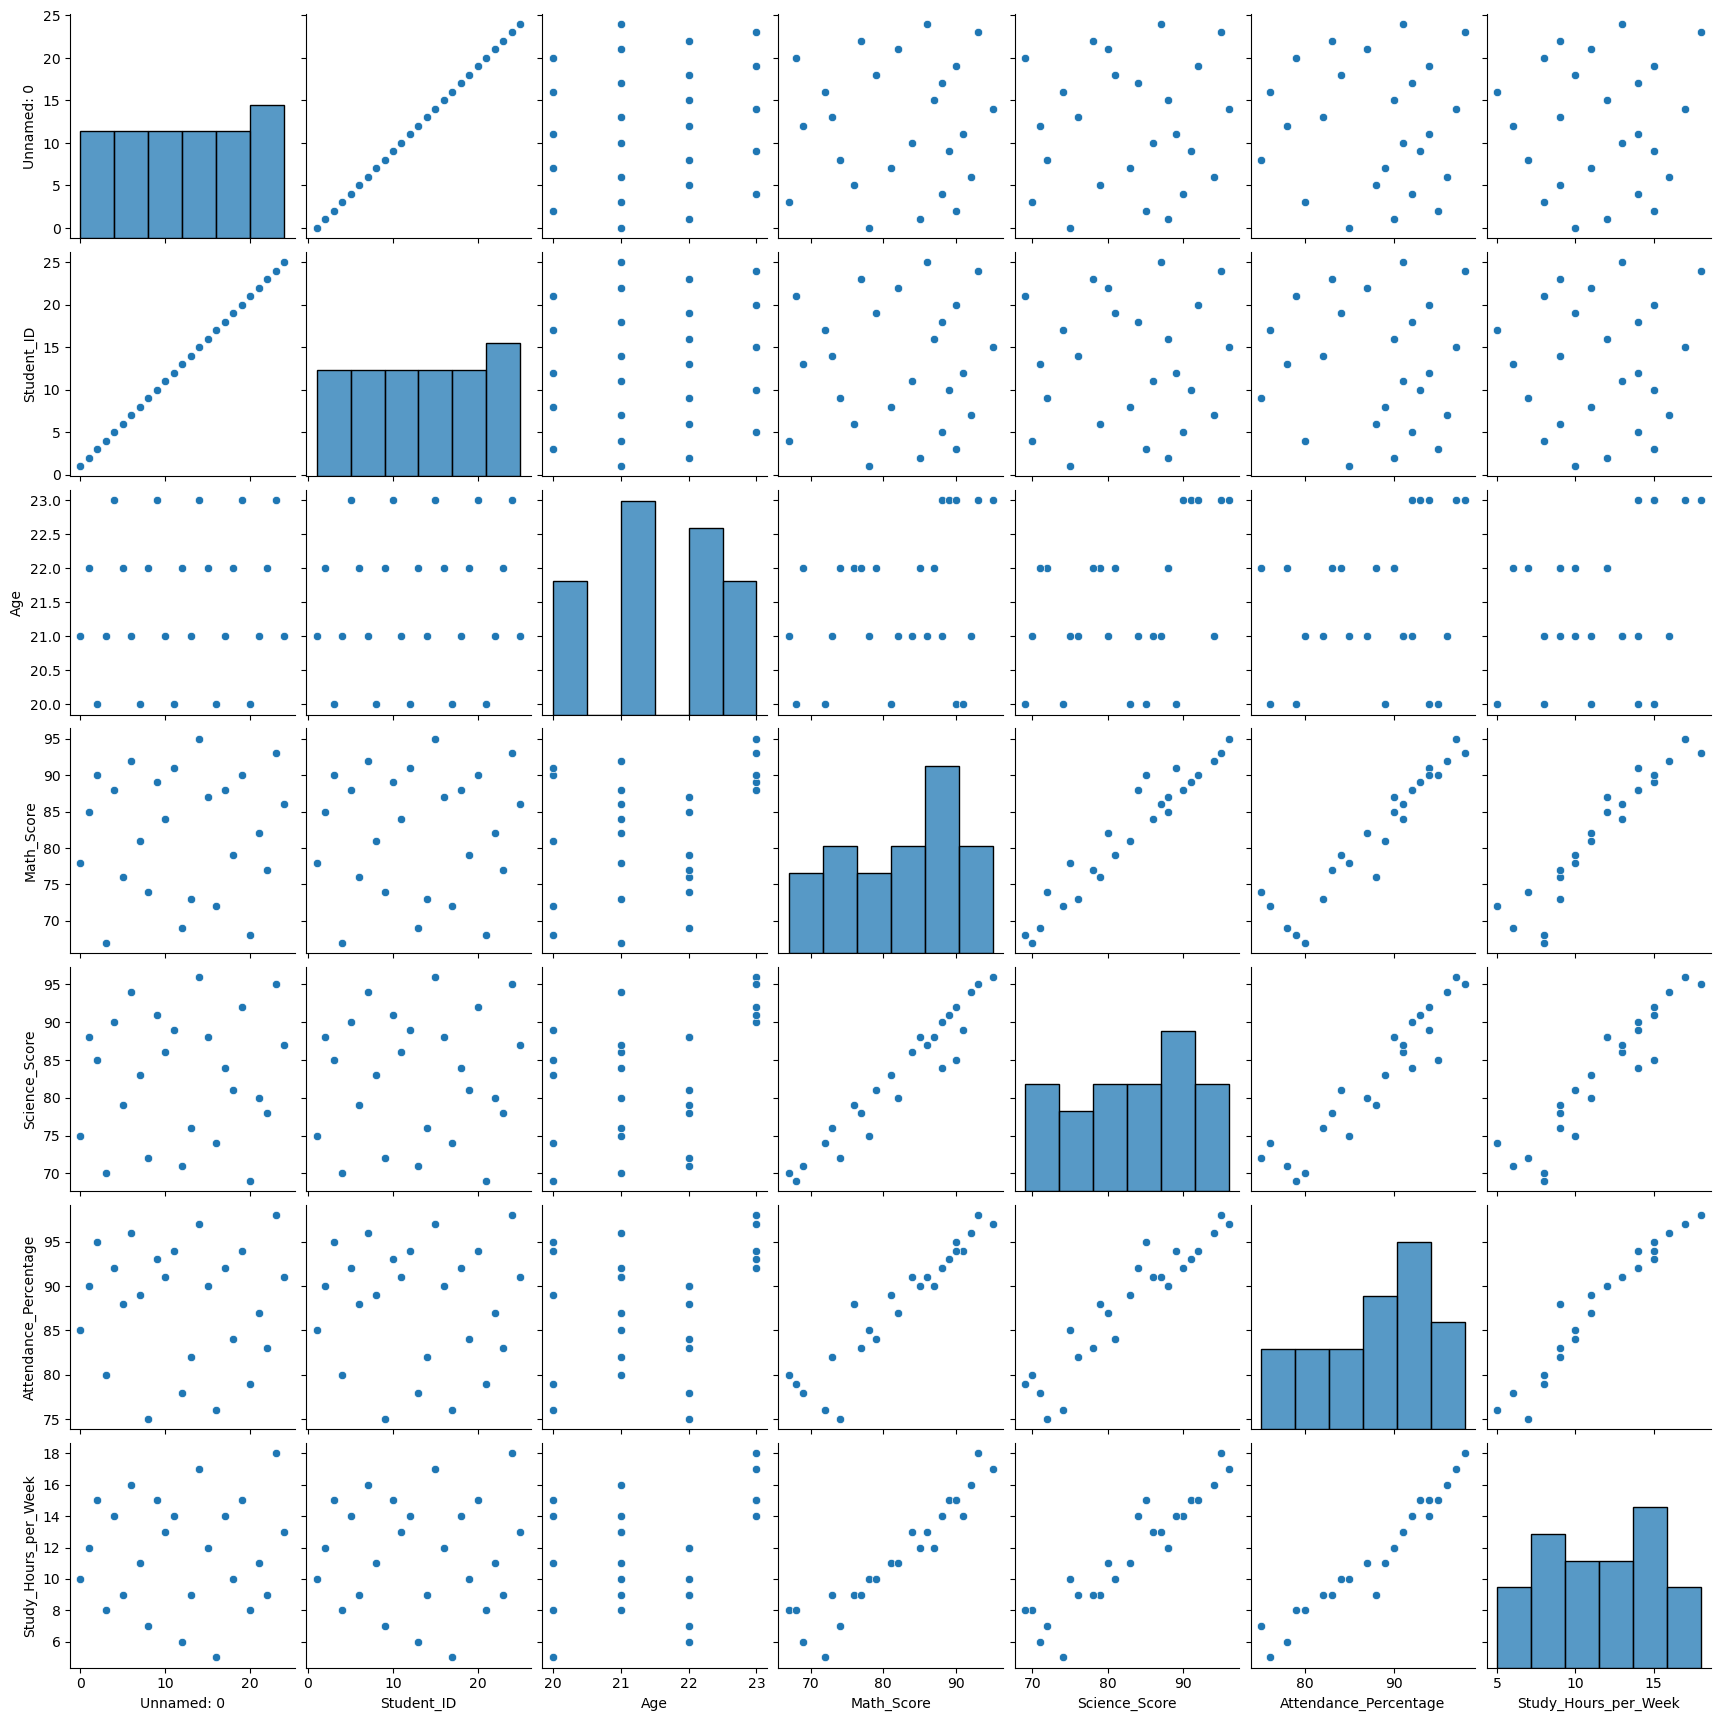

In [125]:
sns.pairplot(data)

Text(0.5, 1.0, 'line chart')

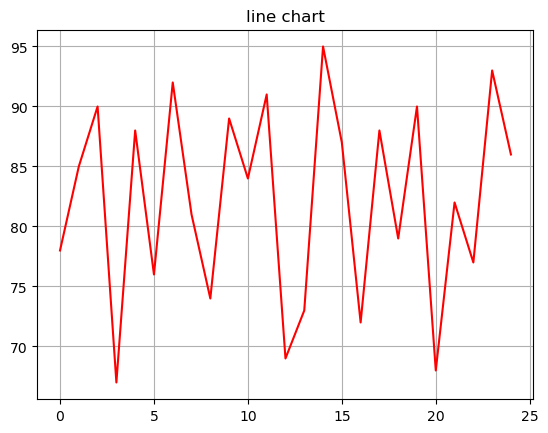

In [129]:
plt.plot(data.Math_Score, color="red")
plt.grid()
plt.title("line chart")

Task 1:The Trend Tracker (Line Plots)

In [2]:
import matplotlib.pyplot as plt


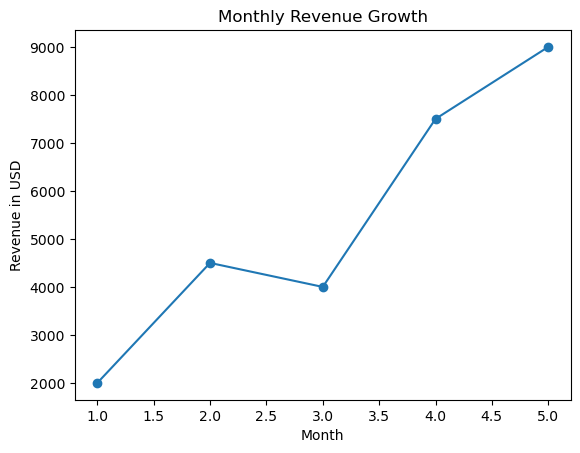

In [3]:
months = [1, 2, 3, 4, 5]
revenue = [2000, 4500, 4000, 7500, 9000]
plt.plot(months, revenue, marker='o')
plt.title("Monthly Revenue Growth")
plt.xlabel("Month")
plt.ylabel("Revenue in USD")
plt.show()